In [127]:
import seaborn as sns
# sns.set_theme(style="whitegrid")
sns.set_style("whitegrid", {"axes.facecolor": "0.985"})
total_results = sns.load_dataset("/results", data_home='./results')

In [74]:
AXIS_LABEL_SIZE = 20
YAXIS_LABEL_SIZE = 20
TITLE_SIZE = 20
LEGEND_SIZE = 16
TICKS_SIZE = 16

# Plot Mixed Envs

/home/rainorangelemon/anaconda3/envs/gnn/lib/python3.8/site-packages/seaborn/_core.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:


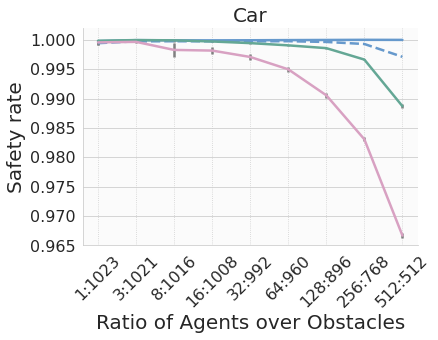

In [126]:
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
import pandas as pd

colors = np.array([[0.4, 0.6, 0.8],[0.4, 0.6, 0.8], [0.39310315, 0.65498975, 0.58411251],
                  [0.84585876, 0.63132944, 0.75965549]])

results = total_results.loc[(total_results['dataset']=='mixed') & (total_results['environment']=='dubins_car')]
results = deepcopy(results)
# results['density'] = [str(d) for d in results['density']]
results['density'] = [str(d) for d in results['density']]
results['density'] = pd.Categorical(results['density'],
                                   categories=['1','3','8','16','32','64','128','256','512'],
                                   ordered=True)

ax = sns.lineplot(x="density", y="safe_rate",sort=True,
                  # x_order=['1','3','8','16','32','64','128','256'],
                  hue_order=['CAM','CAM_no_decompose','DDPG','MACBF'],
                  hue="method", data=results,
                  palette=colors,legend=False,
                  err_style='bars', linewidth=2.5)
ax.lines[1].set_linestyle("--")
# ax.legend(loc='lower left', bbox_to_anchor=(0.5, 1.15),
#           ncol=3, fancybox=False, shadow=False)
ax.set_ylim(0.965, 1.002)
# ax.set_xlim(-0.5, 20.5)
# ax.set_xscale('log')
ax.set_xticklabels(['{0:s}:{1:d}'.format(i, 1024-int(i)) for i in ['1','3','8','16','32','64','128','256','512']])
ax.yaxis.set_ticks(np.arange(0.965, 1.0001, 0.005))
# leg = ax.legend(loc='center left', ncol=1, 
#                 fancybox=True, shadow=False, fontsize=LEGEND_SIZE,
#                 labels=['CAM', 'CAM w/o \nDecomposition', 'DDPG (GNN)', 'MACBF (GNN)'])
# leg.get_lines()[1].set_linestyle("--")
ax.set_ylabel('Safety rate', fontsize=AXIS_LABEL_SIZE)
ax.set_xlabel('Ratio of Agents over Obstacles', fontsize=AXIS_LABEL_SIZE)
plt.xticks(rotation=45)
ax.set_title('Car', fontsize=TITLE_SIZE)
plt.tick_params(labelsize=TICKS_SIZE)
ax.yaxis.grid(True)
ax.xaxis.grid(True, linestyle=':')
# plt.setp(ax.patches, linewidth=0.01)
for patch in ax.patches:
    clr = patch.get_facecolor()
    patch.set_edgecolor(clr)
sns.despine()    
ax.errorbar(x=results['density'], 
            y=results['safe_rate'], 
            yerr=0.1*np.array(results['safe_rate_std']), 
            barsabove=True,
            ecolor='grey', fmt='none',fillstyle='none', linewidth=2.5)    
plt.savefig('results/plots/car_safe.pdf', bbox_inches='tight')    

/home/rainorangelemon/anaconda3/envs/gnn/lib/python3.8/site-packages/seaborn/_core.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:


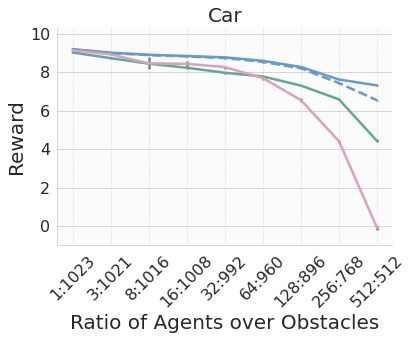

In [60]:
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
import pandas as pd

colors = np.array([[0.4, 0.6, 0.8],[0.4, 0.6, 0.8],[0.39310315, 0.65498975, 0.58411251],
                  [0.84585876, 0.63132944, 0.75965549]])

results = total_results.loc[(total_results['dataset']=='mixed') & (total_results['environment']=='dubins_car')]
results = deepcopy(results)
# results['density'] = [str(d) for d in results['density']]
results['density'] = [str(d) for d in results['density']]
results['density'] = pd.Categorical(results['density'],
                                   categories=['1','3','8','16','32','64','128','256','512'],
                                   ordered=True)

ax = sns.lineplot(x="density", y="reward",sort=True,
                  # x_order=['1','3','8','16','32','64','128','256'],
                  hue_order=['CAM','CAM_no_decompose','DDPG','MACBF'],
                  hue="method", data=results,
                  palette=colors,legend=False,
                  err_style='bars', linewidth=2.5)
ax.lines[1].set_linestyle("--")
# ax.legend(loc='lower left', bbox_to_anchor=(0.5, 1.15),
#           ncol=3, fancybox=False, shadow=False)
ax.set_ylim(-1, 10.3)
# ax.set_xlim(-0.5, 20.5)
# ax.set_xscale('log')
# ax.set_xticks()
ax.set_xticklabels(['{0:s}:{1:d}'.format(i, 1024-int(i)) for i in ['1','3','8','16','32','64','128','256','512']])
# ax.set_yticks([0.92,0.94,0.96,0.98,1.0])
# leb = ax.legend(loc='center left', ncol=1, fancybox=True, 
#           shadow=False, fontsize=LEGEND_SIZE,
#           labels=['CAM', 'CAM w/o \nDecomposition', 'DDPG (GNN)', 'MACBF (GNN)'])
# leg.get_lines()[1].set_linestyle("--")
ax.set_ylabel('Reward', fontsize=AXIS_LABEL_SIZE)
ax.set_xlabel('Ratio of Agents over Obstacles', fontsize=AXIS_LABEL_SIZE)
plt.xticks(rotation=45)
ax.set_title('Car', fontsize=TITLE_SIZE)
plt.tick_params(labelsize=TICKS_SIZE)
ax.yaxis.grid(True)
ax.xaxis.grid(True, linestyle=':')
# plt.setp(ax.patches, linewidth=0.01)
for patch in ax.patches:
    clr = patch.get_facecolor()
    patch.set_edgecolor(clr)
sns.despine()    
ax.errorbar(x=results['density'], 
            y=results['reward'], 
            yerr=0.1*np.array(results['reward_std']), 
            barsabove=True,
            ecolor='grey', fmt='none',fillstyle='none', linewidth=2.5)    
plt.savefig('results/plots/car_reward.pdf', bbox_inches='tight')    

/home/rainorangelemon/anaconda3/envs/gnn/lib/python3.8/site-packages/seaborn/_core.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:


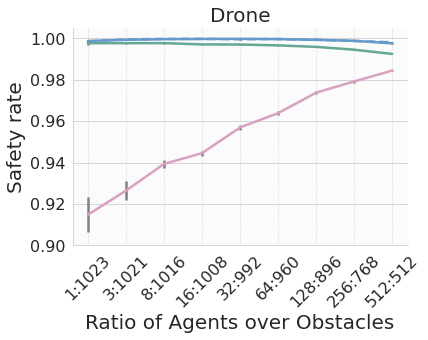

In [64]:
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
import pandas as pd

colors = np.array([[0.4, 0.6, 0.8],[0.4, 0.6, 0.8],[0.39310315, 0.65498975, 0.58411251],
                  [0.84585876, 0.63132944, 0.75965549]])

results = total_results.loc[(total_results['dataset']=='mixed') & (total_results['environment']=='drone')]
results = deepcopy(results)
# results['density'] = [str(d) for d in results['density']]
results['density'] = [str(d) for d in results['density']]
results['density'] = pd.Categorical(results['density'],
                                   categories=['1','3','8','16','32','64','128','256','512'],
                                   ordered=True)

ax = sns.lineplot(x="density", y="safe_rate",sort=True,
                  # x_order=['1','3','8','16','32','64','128','256'],
                  hue_order=['CAM','CAM_no_decompose','DDPG','MACBF'],
                  hue="method", data=results,
                  palette=colors,
                  err_style='bars', linewidth=2.5, legend=False)
ax.lines[1].set_linestyle("--")
# ax.legend(loc='lower left', bbox_to_anchor=(0.5, 1.15),
#           ncol=3, fancybox=False, shadow=False)
ax.set_ylim(0.9, 1.005)
# ax.set_xlim(-0.5, 20.5)
# ax.set_xscale('log')
ax.set_xticklabels(['{0:s}:{1:d}'.format(i, 1024-int(i)) for i in ['1','3','8','16','32','64','128','256','512']])
ax.set_yticks([0.9,0.92,0.94,0.96,0.98,1.0])
# ax.legend(loc='lower right', ncol=1, fancybox=True, shadow=False, fontsize=LEGEND_SIZE)
ax.set_ylabel('Safety rate', fontsize=AXIS_LABEL_SIZE)
ax.set_xlabel('Ratio of Agents over Obstacles', fontsize=AXIS_LABEL_SIZE)
plt.xticks(rotation=45)
ax.set_title('Drone', fontsize=TITLE_SIZE)
plt.tick_params(labelsize=TICKS_SIZE)
ax.yaxis.grid(True)
ax.xaxis.grid(True, linestyle=':')
# plt.setp(ax.patches, linewidth=0.01)
for patch in ax.patches:
    clr = patch.get_facecolor()
    patch.set_edgecolor(clr)
sns.despine()    
ax.errorbar(x=results['density'], 
            y=results['safe_rate'], 
            yerr=0.1*np.array(results['safe_rate_std']), 
            barsabove=True,
            ecolor='grey', fmt='none',fillstyle='none', linewidth=2.5)    
plt.savefig('results/plots/drone_safe.pdf', bbox_inches='tight')    

/home/rainorangelemon/anaconda3/envs/gnn/lib/python3.8/site-packages/seaborn/_core.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:


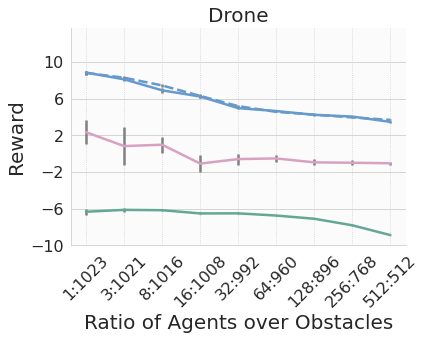

In [65]:
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
import pandas as pd

colors = np.array([[0.4, 0.6, 0.8],[0.4, 0.6, 0.8],[0.39310315, 0.65498975, 0.58411251],
                  [0.84585876, 0.63132944, 0.75965549]])

results = total_results.loc[(total_results['dataset']=='mixed') & (total_results['environment']=='drone')]
results = deepcopy(results)
# results['density'] = [str(d) for d in results['density']]
results['density'] = [str(d) for d in results['density']]
results['density'] = pd.Categorical(results['density'],
                                   categories=['1','3','8','16','32','64','128','256','512'],
                                   ordered=True)

ax = sns.lineplot(x="density", y="reward",sort=True,
                  # x_order=['1','3','8','16','32','64','128','256'],
                  hue_order=['CAM','CAM_no_decompose','DDPG','MACBF'],
                  hue="method", data=results,
                  palette=colors,
                  err_style='bars', linewidth=2.5, legend=False)
ax.lines[1].set_linestyle("--")
# ax.legend(loc='lower left', bbox_to_anchor=(0.5, 1.15),
#           ncol=3, fancybox=False, shadow=False)
ax.set_ylim(-9.5, 13.7)
# ax.set_xlim(-0.5, 20.5)
# ax.set_xscale('log')
# ax.set_xticks()
ax.set_xticklabels(['{0:s}:{1:d}'.format(i, 1024-int(i)) for i in ['1','3','8','16','32','64','128','256','512']])
ax.yaxis.set_ticks(np.arange(-10, 14, 4))
# ax.set_yticks([0.92,0.94,0.96,0.98,1.0])
# ax.legend(loc='upper right', ncol=1, fancybox=True, shadow=False, fontsize=LEGEND_SIZE)
ax.set_ylabel('Reward', fontsize=AXIS_LABEL_SIZE)
ax.set_xlabel('Ratio of Agents over Obstacles', fontsize=AXIS_LABEL_SIZE)
plt.xticks(rotation=45)
ax.set_title('Drone', fontsize=TITLE_SIZE)
plt.tick_params(labelsize=TICKS_SIZE)
ax.yaxis.grid(True)
ax.xaxis.grid(True, linestyle=':')
# plt.setp(ax.patches, linewidth=0.01)
for patch in ax.patches:
    clr = patch.get_facecolor()
    patch.set_edgecolor(clr)
sns.despine()    
ax.errorbar(x=results['density'], 
            y=results['reward'], 
            yerr=0.1*np.array(results['reward_std']), 
            barsabove=True,
            ecolor='grey', fmt='none',fillstyle='none', linewidth=2.5)    
plt.savefig('results/plots/drone_reward.pdf', bbox_inches='tight')    

/home/rainorangelemon/anaconda3/envs/gnn/lib/python3.8/site-packages/seaborn/_core.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:


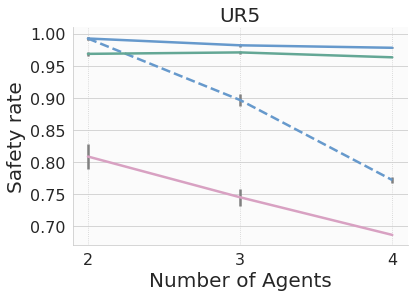

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
import pandas as pd

colors = np.array([[0.4, 0.6, 0.8],[0.4, 0.6, 0.8],[0.39310315, 0.65498975, 0.58411251],
                  [0.84585876, 0.63132944, 0.75965549]])

results = total_results.loc[(total_results['dataset']=='static') & (total_results['environment']=='ur5')]
results = deepcopy(results)
# results['density'] = [str(d) for d in results['density']]
results['density'] = [str(d) for d in results['density']]
results['density'] = pd.Categorical(results['density'],
                                   categories=['2','3','4'],
                                   ordered=True)

ax = sns.lineplot(x="density", y="safe_rate",sort=True,
                  # x_order=['1','3','8','16','32','64','128','256'],
                  hue_order=['CAM','CAM_no_decompose','DDPG','MACBF'],
                  hue="method", data=results,
                  palette=colors,
                  err_style='bars', linewidth=2.5, legend=False)
ax.lines[1].set_linestyle("--")
# ax.legend(loc='lower left', bbox_to_anchor=(0.5, 1.15),
#           ncol=3, fancybox=False, shadow=False)
# ax.set_ylim(0.965, 1.001)
# ax.set_xlim(-0.5, 20.5)
# ax.set_xscale('log')
ax.set_xticklabels(['2', '3', '4'])
ax.yaxis.set_ticks(np.arange(0.65, 1.01, 0.05))
# leg = ax.legend(loc='center right', ncol=1, fancybox=True, shadow=False, fontsize=LEGEND_SIZE)
ax.set_ylabel('Safety rate', fontsize=AXIS_LABEL_SIZE)
ax.set_xlabel('Number of Agents', fontsize=AXIS_LABEL_SIZE)
ax.set_title('UR5', fontsize=TITLE_SIZE)
plt.tick_params(labelsize=TICKS_SIZE)
ax.yaxis.grid(True)
ax.xaxis.grid(True, linestyle=':')
# plt.setp(ax.patches, linewidth=0.01)
for patch in ax.patches:
    clr = patch.get_facecolor()
    patch.set_edgecolor(clr)
sns.despine()    
ax.errorbar(x=results['density'], 
            y=results['safe_rate'], 
            yerr=0.1*np.array(results['safe_rate_std']), 
            barsabove=True,
            ecolor='grey', fmt='none',fillstyle='none', linewidth=2.5)    
plt.savefig('results/plots/ur5_safe.pdf', bbox_inches='tight')    

/home/rainorangelemon/anaconda3/envs/gnn/lib/python3.8/site-packages/seaborn/_core.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:


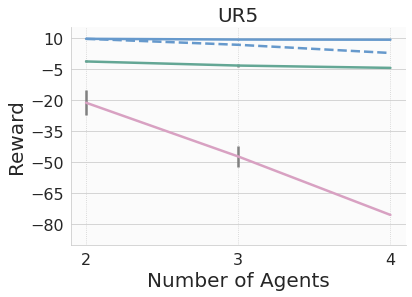

In [62]:
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
import pandas as pd

colors = np.array([[0.4, 0.6, 0.8],[0.4, 0.6, 0.8],[0.39310315, 0.65498975, 0.58411251],
                  [0.84585876, 0.63132944, 0.75965549]])

results = total_results.loc[(total_results['dataset']=='static') & (total_results['environment']=='ur5')]
results = deepcopy(results)
# results['density'] = [str(d) for d in results['density']]
results['density'] = [str(d) for d in results['density']]
results['density'] = pd.Categorical(results['density'],
                                   categories=['2','3','4'],
                                   ordered=True)

ax = sns.lineplot(x="density", y="reward",sort=True,
                  # x_order=['1','3','8','16','32','64','128','256'],
                  hue_order=['CAM','CAM_no_decompose','DDPG','MACBF'],
                  hue="method", data=results,
                  palette=colors, legend=False,
                  err_style='bars', linewidth=2.5)
ax.lines[1].set_linestyle("--")
ax.set_ylim(-90, 15)
# ax.set_xlim(-0.5, 20.5)
# ax.set_xscale('log')
ax.set_xticklabels(['2', '3', '4'])
ax.set_yticks([-80, -65, -50, -35, -20, -5, 10])
# leg = ax.legend(loc='upper center', ncol=4, fancybox=False,bbox_to_anchor=(1.5, 1.5),
#           shadow=False, fontsize=LEGEND_SIZE,
#           labels=['CAM', 'CAM w/o \nDecomposition', 'DDPG (GNN)', 'MACBF (GNN)'])
# leg.get_lines()[1].set_linestyle("--")

ax.set_ylabel('Reward', fontsize=AXIS_LABEL_SIZE)
ax.set_xlabel('Number of Agents', fontsize=AXIS_LABEL_SIZE)
ax.set_title('UR5', fontsize=TITLE_SIZE)
plt.tick_params(labelsize=TICKS_SIZE)
ax.yaxis.grid(True)
ax.xaxis.grid(True, linestyle=':')
# plt.setp(ax.patches, linewidth=0.01)
for patch in ax.patches:
    clr = patch.get_facecolor()
    patch.set_edgecolor(clr)
sns.despine()    
ax.errorbar(x=results['density'], 
            y=results['reward'], 
            yerr=0.1*np.array(results['reward_std']), 
            barsabove=True,
            ecolor='grey', fmt='none',fillstyle='none', linewidth=2.5)    
plt.savefig('results/plots/ur5_reward.pdf', bbox_inches='tight')    

/home/rainorangelemon/anaconda3/envs/gnn/lib/python3.8/site-packages/seaborn/_core.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:


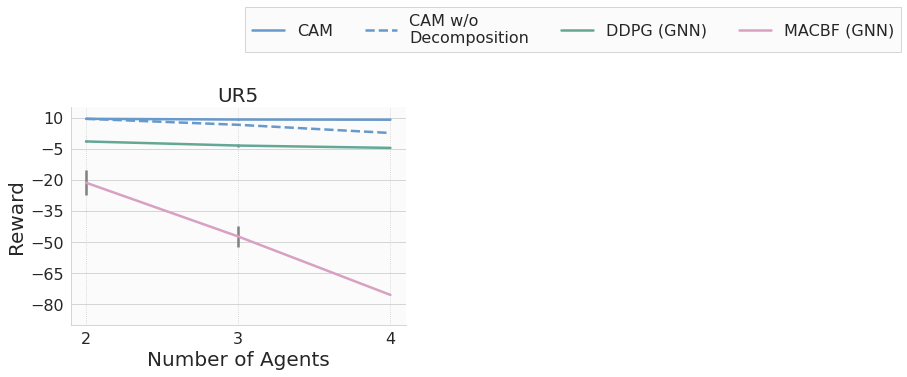

In [66]:
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
import pandas as pd

colors = np.array([[0.4, 0.6, 0.8],[0.4, 0.6, 0.8],[0.39310315, 0.65498975, 0.58411251],
                  [0.84585876, 0.63132944, 0.75965549]])

results = total_results.loc[(total_results['dataset']=='static') & (total_results['environment']=='ur5')]
results = deepcopy(results)
# results['density'] = [str(d) for d in results['density']]
results['density'] = [str(d) for d in results['density']]
results['density'] = pd.Categorical(results['density'],
                                   categories=['2','3','4'],
                                   ordered=True)

ax = sns.lineplot(x="density", y="reward",sort=True,
                  # x_order=['1','3','8','16','32','64','128','256'],
                  hue_order=['CAM','CAM_no_decompose','DDPG','MACBF'],
                  hue="method", data=results,
                  palette=colors, legend=False,
                  err_style='bars', linewidth=2.5)
ax.lines[1].set_linestyle("--")
ax.set_ylim(-90, 15)
# ax.set_xlim(-0.5, 20.5)
# ax.set_xscale('log')
ax.set_xticklabels(['2', '3', '4'])
ax.set_yticks([-80, -65, -50, -35, -20, -5, 10])
leg = ax.legend(loc='upper center', ncol=4, fancybox=False,bbox_to_anchor=(1.5, 1.5),
          shadow=False, fontsize=LEGEND_SIZE,
          labels=['CAM', 'CAM w/o \nDecomposition', 'DDPG (GNN)', 'MACBF (GNN)'])
leg.get_lines()[1].set_linestyle("--")

ax.set_ylabel('Reward', fontsize=AXIS_LABEL_SIZE)
ax.set_xlabel('Number of Agents', fontsize=AXIS_LABEL_SIZE)
ax.set_title('UR5', fontsize=TITLE_SIZE)
plt.tick_params(labelsize=TICKS_SIZE)
ax.yaxis.grid(True)
ax.xaxis.grid(True, linestyle=':')
# plt.setp(ax.patches, linewidth=0.01)
for patch in ax.patches:
    clr = patch.get_facecolor()
    patch.set_edgecolor(clr)
sns.despine()    
ax.errorbar(x=results['density'], 
            y=results['reward'], 
            yerr=0.1*np.array(results['reward_std']), 
            barsabove=True,
            ecolor='grey', fmt='none',fillstyle='none', linewidth=2.5)    
plt.savefig('results/plots/legend.pdf', bbox_inches='tight')    

/home/rainorangelemon/anaconda3/envs/gnn/lib/python3.8/site-packages/seaborn/_core.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:


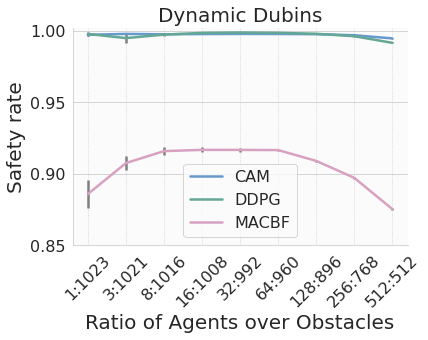

In [138]:
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
import pandas as pd

colors = np.array([[0.4, 0.6, 0.8], [0.39310315, 0.65498975, 0.58411251],
                  [0.84585876, 0.63132944, 0.75965549], # [0.4, 0.6, 0.8]
                  ])

results = total_results.loc[(total_results['dataset']=='mixed') & (total_results['environment']=='multi_dynamic_dubins')]
results = deepcopy(results)
# results['density'] = [str(d) for d in results['density']]
results['density'] = [str(d) for d in results['density']]
results['density'] = pd.Categorical(results['density'],
                                   categories=['1','3','8','16','32','64','128','256','512'],
                                   ordered=True)

ax = sns.lineplot(x="density", y="safe_rate",sort=True,
                  # x_order=['1','3','8','16','32','64','128','256'],
                  hue_order=['CAM','DDPG','MACBF',#'CAM_no_decompose',
                            ],
                  hue="method", data=results,
                  palette=colors,legend=False,
                  err_style='bars', linewidth=2.5)
# ax.lines[1].set_linestyle("--")
ax.set_ylim(0.85, 1.002)
# ax.set_xlim(-0.5, 20.5)
# ax.set_xscale('log')
ax.set_xticklabels(['{0:s}:{1:d}'.format(i, 1024-int(i)) for i in ['1','3','8','16','32','64','128','256','512']])
# ax.yaxis.set_ticks(np.arange(0.965, 1.0001, 0.005))
leb = ax.legend(loc='lower center', ncol=1, fancybox=True, 
          shadow=False, fontsize=LEGEND_SIZE,
          labels=['CAM', 'DDPG', 'MACBF', 'CAM w/o \nDecomposition',])
# leg = ax.legend(loc='center left', ncol=1, 
#                 fancybox=True, shadow=False, fontsize=LEGEND_SIZE,
#                 labels=['CAM', 'CAM w/o \nDecomposition', 'DDPG (GNN)', 'MACBF (GNN)'])
# leg.get_lines()[1].set_linestyle("--")
ax.set_ylabel('Safety rate', fontsize=AXIS_LABEL_SIZE)
ax.set_xlabel('Ratio of Agents over Obstacles', fontsize=AXIS_LABEL_SIZE)
plt.xticks(rotation=45)
ax.set_title('Dynamic Dubins', fontsize=TITLE_SIZE)
plt.tick_params(labelsize=TICKS_SIZE)
ax.yaxis.grid(True)
ax.xaxis.grid(True, linestyle=':')
# plt.setp(ax.patches, linewidth=0.01)
for patch in ax.patches:
    clr = patch.get_facecolor()
    patch.set_edgecolor(clr)
sns.despine()    
ax.errorbar(x=results['density'], 
            y=results['safe_rate'], 
            yerr=0.1*np.array(results['safe_rate_std']), 
            barsabove=True,
            ecolor='grey', fmt='none',fillstyle='none', linewidth=2.5)    
plt.savefig('results/plots/dd_safe.pdf', bbox_inches='tight')    

/home/rainorangelemon/anaconda3/envs/gnn/lib/python3.8/site-packages/seaborn/_core.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:


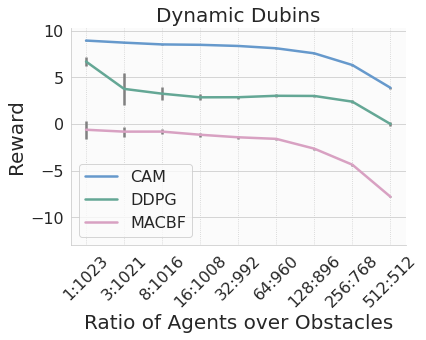

In [135]:
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
import pandas as pd

colors = np.array([[0.4, 0.6, 0.8],[0.39310315, 0.65498975, 0.58411251],
                  [0.84585876, 0.63132944, 0.75965549],#[0.4, 0.6, 0.8],
                  ])

results = total_results.loc[(total_results['dataset']=='mixed') & (total_results['environment']=='multi_dynamic_dubins')]
results = deepcopy(results)
# results['density'] = [str(d) for d in results['density']]
results['density'] = [str(d) for d in results['density']]
results['density'] = pd.Categorical(results['density'],
                                   categories=['1','3','8','16','32','64','128','256','512'],
                                   ordered=True)

ax = sns.lineplot(x="density", y="reward",sort=True,
                  # x_order=['1','3','8','16','32','64','128','256'],
                  hue_order=['CAM','DDPG','MACBF',# 'CAM_no_decompose',
                            ],
                  hue="method", data=results,
                  palette=colors,legend=False,
                  err_style='bars', linewidth=2.5)
# ax.lines[1].set_linestyle("--")
# ax.legend(loc='lower left', bbox_to_anchor=(0.5, 1.15),
#           ncol=3, fancybox=False, shadow=False)
ax.set_ylim(-13, 10.3)
# ax.set_xlim(-0.5, 20.5)
# ax.set_xscale('log')
# ax.set_xticks()
ax.set_xticklabels(['{0:s}:{1:d}'.format(i, 1024-int(i)) for i in ['1','3','8','16','32','64','128','256','512']])
# ax.set_yticks([0.92,0.94,0.96,0.98,1.0])
leb = ax.legend(loc='lower left', ncol=1, fancybox=True, 
          shadow=False, fontsize=LEGEND_SIZE,
          labels=['CAM', 'DDPG', 'MACBF', 'CAM w/o \nDecomposition',])
# leg.get_lines()[1].set_linestyle("--")
ax.set_ylabel('Reward', fontsize=AXIS_LABEL_SIZE)
ax.set_xlabel('Ratio of Agents over Obstacles', fontsize=AXIS_LABEL_SIZE)
plt.xticks(rotation=45)
ax.set_title('Dynamic Dubins', fontsize=TITLE_SIZE)
plt.tick_params(labelsize=TICKS_SIZE)
ax.yaxis.grid(True)
ax.xaxis.grid(True, linestyle=':')
# plt.setp(ax.patches, linewidth=0.01)
for patch in ax.patches:
    clr = patch.get_facecolor()
    patch.set_edgecolor(clr)
sns.despine()    
ax.errorbar(x=results['density'], 
            y=results['reward'], 
            yerr=0.1*np.array(results['reward_std']), 
            barsabove=True,
            ecolor='grey', fmt='none',fillstyle='none', linewidth=2.5)    
plt.savefig('results/plots/dd_reward.pdf', bbox_inches='tight')    